In [1]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style='white')

tips = sns.load_dataset('tips')
tips['day'] = tips['day'].map({
    'Thur': '4-Thur',
    'Fri': '5-Fri',
    'Sat': '6-Sat',
    'Sun': '7-Sun'
})
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,7-Sun,Dinner,2
1,10.34,1.66,Male,No,7-Sun,Dinner,3
2,21.01,3.50,Male,No,7-Sun,Dinner,3
3,23.68,3.31,Male,No,7-Sun,Dinner,2
4,24.59,3.61,Female,No,7-Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,6-Sat,Dinner,3
240,27.18,2.00,Female,Yes,6-Sat,Dinner,2
241,22.67,2.00,Male,Yes,6-Sat,Dinner,2
242,17.82,1.75,Male,No,6-Sat,Dinner,2


In [2]:
level = 0.95

# Función para calcular el intervalo de confianza
def confidence_interval(data, level=0.95):
    n = len(data)
    mean = np.mean(data)
    stderr = stats.sem(data)
    h = stderr * stats.t.ppf((1+level)/2.0, n-1)
    return mean, mean - h, mean + h

# Propina promedio general
mean, li, ls = confidence_interval(tips['tip'], level)
print(f'\nPropina promedio general: ${mean:.2f} (IC{level*100}%: ${li:.2f} – ${ls:.2f})')

# Cuenta promedio general
mean_total, li_total, ls_total = confidence_interval(tips['total_bill'], level)
print(f'Cuenta promedio general: ${mean_total:.2f} (IC{level*100}%: ${li_total:.2f} – ${ls_total:.2f})')


Propina promedio general: $3.00 (IC95.0%: $2.82 – $3.17)
Cuenta promedio general: $19.79 (IC95.0%: $18.66 – $20.91)


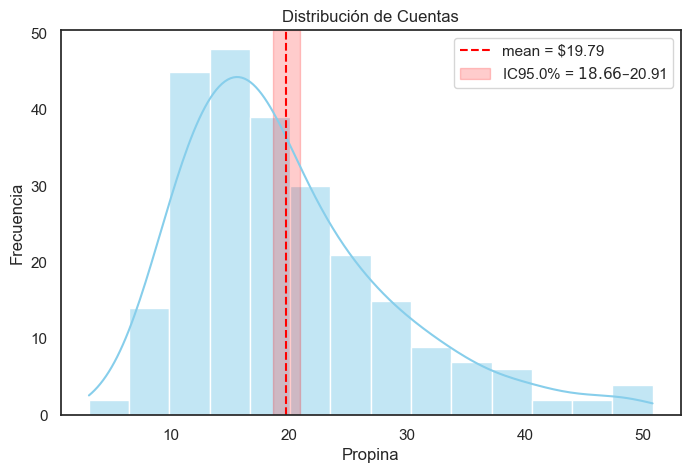

In [3]:
# Gráfico general: Distribución de cuentas
plt.figure(figsize=(8,5))
sns.histplot(tips['total_bill'], kde=True, color='skyblue')
plt.axvline(mean_total, color='red', linestyle='--', label=f'mean = ${mean_total:.2f}')
plt.axvspan(li_total, ls_total, color='red', alpha=0.2, label=f'IC{level*100}% = ${li_total:.2f}–${ls_total:.2f}')
plt.title('Distribución de Cuentas')
plt.xlabel('Propina')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

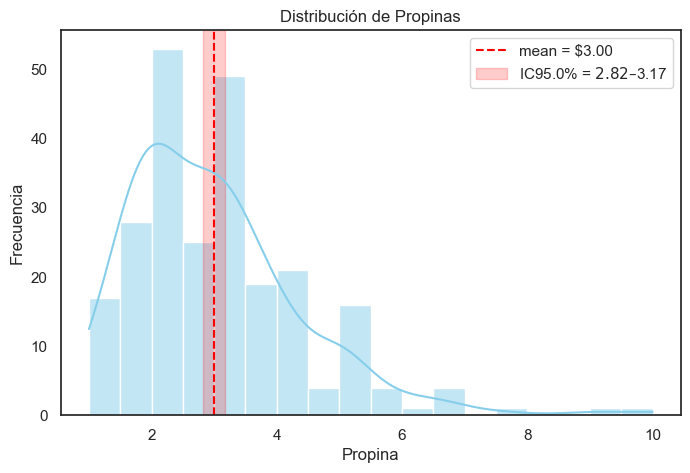

In [4]:
# Gráfico general: Distribución de propinas
plt.figure(figsize=(8,5))
sns.histplot(tips['tip'], kde=True, color='skyblue')
plt.axvline(mean, color='red', linestyle='--', label=f'mean = ${mean:.2f}')
plt.axvspan(li, ls, color='red', alpha=0.2, label=f'IC{level*100}% = ${li:.2f}–${ls:.2f}')
plt.title('Distribución de Propinas')
plt.xlabel('Propina')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


--- Intervalos de confianza por día ---


,day,mean,LI,LS,amplitud
0,4-Thur,2.77,2.46,3.09,0.63
1,5-Fri,2.73,2.24,3.23,0.98
2,6-Sat,2.99,2.65,3.34,0.70
3,7-Sun,3.26,2.97,3.54,0.56


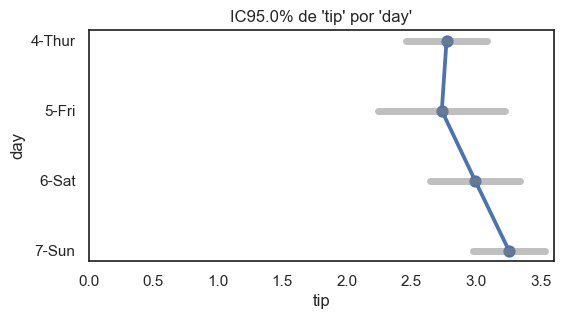


--- Intervalos por sexo del cliente ---


,sex,mean,LI,LS,amplitud
0,Male,3.09,2.85,3.32,0.47
1,Female,2.83,2.59,3.08,0.49


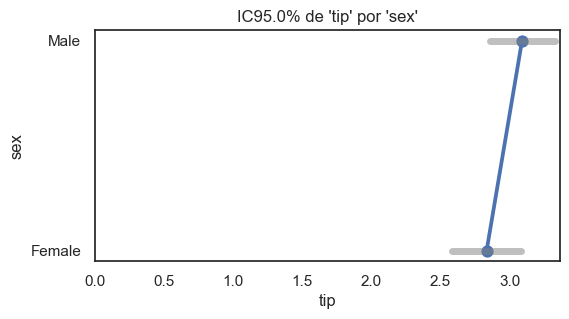


--- Intervalos por fumador ---


,smoker,mean,LI,LS,amplitud
0,Yes,3.01,2.72,3.30,0.58
1,No,2.99,2.77,3.21,0.44


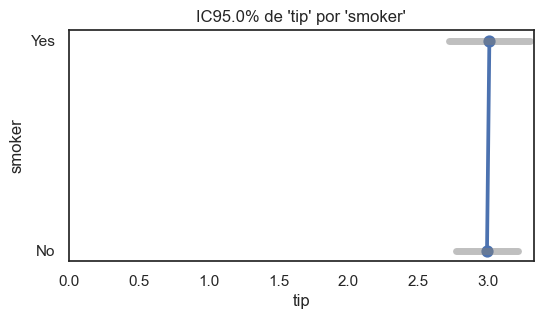


--- Intervalos por fumador ---


,day,smoker,mean,LI,LS,amplitud
0,4-Thur,Yes,3.03,2.46,3.60,1.15
1,4-Thur,No,2.67,2.29,3.06,0.77
2,5-Fri,Yes,2.71,2.12,3.31,1.19
3,5-Fri,No,2.81,1.38,4.24,2.86
4,6-Sat,Yes,2.88,2.37,3.38,1.02
5,6-Sat,No,3.10,2.61,3.60,0.99
6,7-Sun,Yes,3.52,2.91,4.12,1.22
7,7-Sun,No,3.17,2.84,3.49,0.65


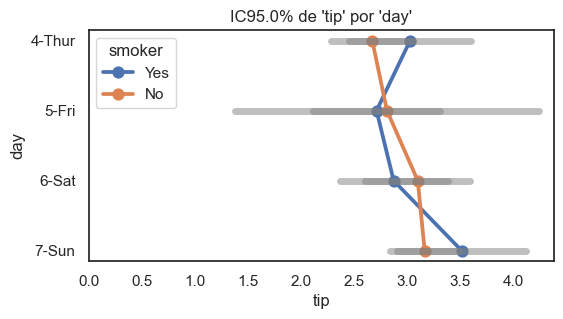

In [5]:
# Intervalos por grupo
def plot_ic_per_group(df, group_col, value_col, hue=None):
    result_df = df.groupby(group_col,observed=False).apply(
        lambda x: pd.Series({
            'mean':confidence_interval(x[value_col], level)[0],
            'LI':confidence_interval(x[value_col], level)[1],
            'LS':confidence_interval(x[value_col], level)[2]
            }), include_groups=False
    ).reset_index()

    result_df['amplitud'] = result_df['LS'] - result_df['LI']
    
    display(result_df.round(2))

    y = group_col[0] if hue else group_col

    plt.figure(figsize=(6,3))
    sns.pointplot(data=result_df, x='mean', y=y, errorbar=None, hue=hue)
    
    for i, row in result_df.iterrows():
        plt.plot([row['LI'], row['LS']], [row[y], row[y]], color='gray',
                 alpha=0.5, linewidth=5)
    
    plt.title(f"IC{level*100}% de '{value_col}' por '{y}'")
    plt.xlim(left=0)
    plt.xlabel(value_col)
    plt.ylabel(y)
    plt.show()
    
    return result_df

# IC por día
print('\n--- Intervalos de confianza por día ---')
ic_dia = plot_ic_per_group(tips, 'day', 'tip')

# IC por sexo
print('\n--- Intervalos por sexo del cliente ---')
ic_sexo = plot_ic_per_group(tips, 'sex', 'tip')

# IC por fumador
print('\n--- Intervalos por fumador ---')
ic_fumador = plot_ic_per_group(tips, 'smoker', 'tip')

print('\n--- Intervalos por fumador ---')
tips = tips.sort_values(by=[])
tips['smoker-day'] = tips['smoker'].astype(str) + ' ' + tips['day'].astype(str)
ic_fumador = plot_ic_per_group(tips, ['day', 'smoker'], 'tip', 'smoker')

**Insights**

- Las propinas más altas son el domingo para fumadores (3.52), y sábado para no fumadores (3.10).
- Viernes hay poca muestra, por eso los IC son más anchos (especialmente para no fumadores).
- Domingo parece el día más rentable en propinas, seguido por jueves y sábado.

**💡 RECOMENDACIONES**
1. **🎯 Segmentación por día y tipo de cliente**

|Día | Público Clave | Acción sugerida|
|--|--|--|
Jueves | No fumadores | Promover ofertas para empresas o ejecutivos (happy hour temprano).
Viernes | Fumadores | Poca afluencia. Hacer campañas para atraer más público (eventos sociales, promos temáticas).
Sábado | Ambos | Mantener buen servicio, quizá diferenciar espacios para fumadores.
Domingo | Fumadores | Excelente día para fidelizar: música en vivo, menú especial, membresías.

2. **📊 Propinas como KPI**

- Incentivar a los meseros a mantener la calidad los domingos, ya que se reciben las mejores propinas.
- Crear un programa de “premio por propina media” para motivar a los meseros en días con menos propina (viernes, por ejemplo).
- Evaluar si hay meseros que atienden mejor a fumadores (propinas más altas), lo cual puede ayudarte a hacer asignaciones estratégicas.